<a href="https://colab.research.google.com/github/epm30/titanic_prediction/blob/master/titanic_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
%ls

gdrive/  sample_data/


In [0]:
%cd gdrive/My\ Drive/Titanic/datasets/

/content/gdrive/My Drive/Titanic/datasets


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
t_train = pd.read_csv('train.csv')
t_test = pd.read_csv('test.csv')

In [0]:
 # train : age, cabin, Embarked
 # test : age, Fare, Cabin 
 # 해당 결측치 처리해야함 cabin은 pclass나 Fare로 구분가능하므로 드랍하기로 함.
 t_train.info(), t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [0]:
t_train[t_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


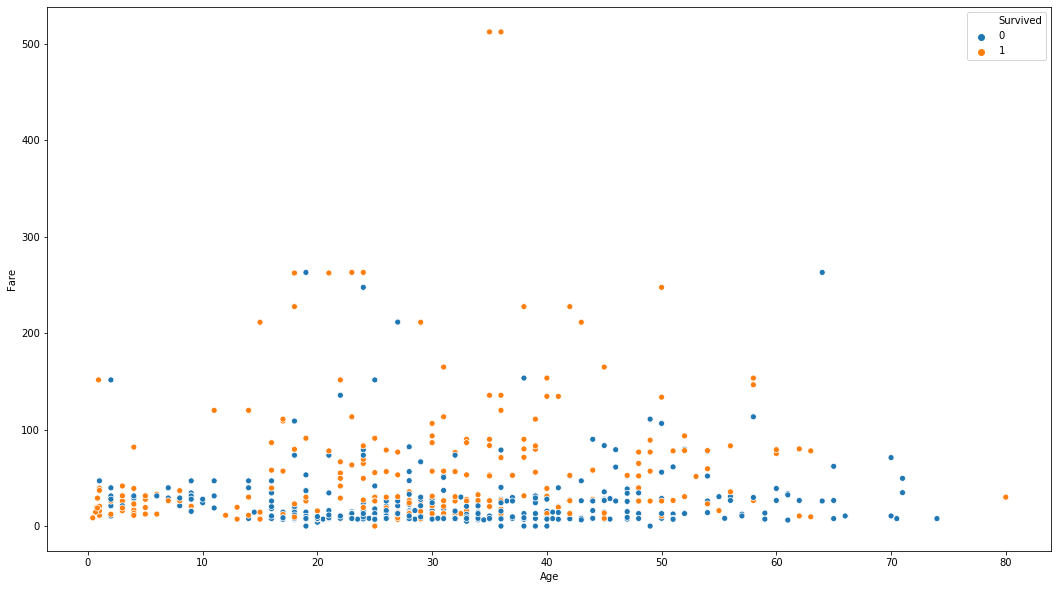

In [0]:
plt.figure(figsize=(18,10))
sns.scatterplot(data = t_train, x = "Age", y = "Fare", hue = "Survived")


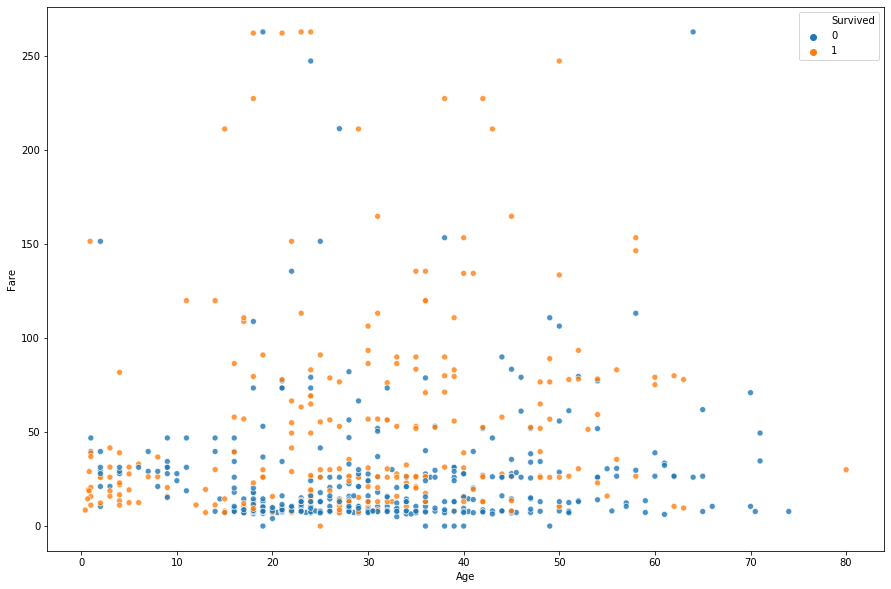

In [0]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = t_train[t_train["Fare"]<300], x = "Age", y = "Fare", hue = "Survived", alpha = 0.8)


In [0]:
t_train[t_train["Name"].str.contains("Master")].max()

PassengerId                                870
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                         12
SibSp                                        8
Parch                                        2
Ticket                         S.C./PARIS 2079
Fare                                    151.55
Embarked                                     S
dtype: object

In [0]:
t_train["Master"] = t_train["Age"] < 13
t_test["Master"] = t_test["Age"] < 13

In [0]:
t_train["Sex_encode"] = t_train["Sex"] == "male"
t_test["Sex_encode"] = t_test["Sex"] == "male"


In [0]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Sex_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,True


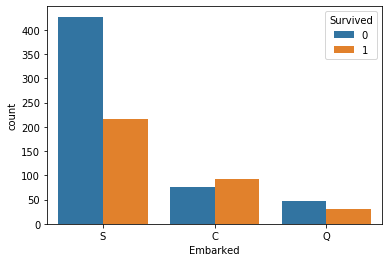

In [0]:
sns.countplot(data = ttrain, x = "Embarked", hue = "Survived")

In [0]:
t_train[t_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Sex_encode,Embarked_S,Embarked_C,Embarked_Q
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,False,False,False,False,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,False,False,False,False,False


In [0]:
t_test[t_test["Embarked"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Sex_encode,Embarked_S,Embarked_C,Embarked_Q


In [0]:
t_train["Embarked_S"] = t_train["Embarked"] == "S"
t_train["Embarked_C"] = t_train["Embarked"] == "C"
t_train["Embarked_Q"] = t_train["Embarked"] == "Q"

t_test["Embarked_S"] = t_test["Embarked"] == "S"
t_test["Embarked_C"] = t_test["Embarked"] == "C"
t_test["Embarked_Q"] = t_test["Embarked"] == "Q"

In [0]:
t_train[t_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Sex_encode,Embarked_S,Embarked_C,Embarked_Q
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,False,False,False,False,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,False,False,False,False,False


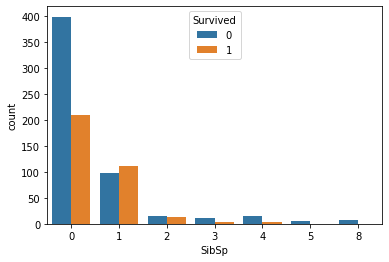

In [0]:
sns.countplot(data = t_train, x = "SibSp", hue = "Survived")

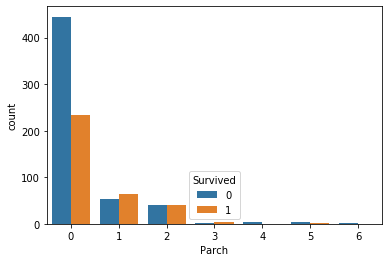

In [0]:
sns.countplot(data = t_train, x = "Parch", hue = "Survived")

In [0]:
t_train["Family"] = t_train["SibSp"] +t_train["Parch"] + 1
t_test["Family"] = t_test["SibSp"] +t_test["Parch"] + 1

In [0]:
t_train["Family"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family, Length: 891, dtype: int64

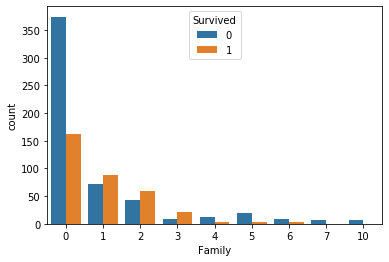

In [0]:
sns.countplot(data = t_train, x = "Family", hue = "Survived")

In [0]:
t_train.loc[t_train["Age"].isnull(), "Age"] = 32.767829
t_test.loc[t_test["Age"].isnull(), "Age"] = 32.738333

In [0]:
t_train[t_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Sex_encode,Embarked_S,Embarked_C,Embarked_Q,Family


In [0]:
t_test[t_test["Age"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Sex_encode,Embarked_S,Embarked_C,Embarked_Q,Family


In [0]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Master         891 non-null bool
Sex_encode     891 non-null bool
Embarked_S     891 non-null bool
Embarked_C     891 non-null bool
Embarked_Q     891 non-null bool
Family         891 non-null int64
dtypes: bool(5), float64(2), int64(6), object(5)
memory usage: 95.0+ KB


In [0]:
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Master         418 non-null bool
Sex_encode     418 non-null bool
Embarked_S     418 non-null bool
Embarked_C     418 non-null bool
Embarked_Q     418 non-null bool
Family         418 non-null int64
dtypes: bool(5), float64(2), int64(5), object(5)
memory usage: 41.4+ KB


In [0]:
# NAN값을 0으로 채운다 
t_train["Fare_fillin"] = t_train["Fare"]
t_test["Fare_fillin"] = t_test["Fare"]

t_train.loc[t_train["Fare"].isnull(), "Fare_fillin"]
t_test.loc[t_test["Fare"].isnull(), "Fare_fillin"] = 0

In [0]:
t_train["Single"]  = t_train["Family"] == 1
t_train["Nuclear"] = (t_train["Family"] > 1) & (t_train["Family"] < 5)
t_train["Big"]     = t_train["Family"] >= 5

t_test["Single"]  = t_test["Family"] == 1
t_test["Nuclear"] = (t_test["Family"] > 1) & (t_test["Family"] < 5)
t_test["Big"]     = t_test["Family"] >= 5

In [0]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S", "Embarked_Q",
                 "Master", "Single", "Nuclear", "Big", "Master"]

In [0]:
label_name = "Survived"

In [0]:
X_train = t_train[feature_names]
X_test = t_test[feature_names]
y_train = t_train[label_name]

In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
feature_names = ['Pclass','Sex_encode','Embarked_encode', 'Family', 'Age_cat', 'Fare_Cat']

In [0]:
# 학습에 쓰일 데이터와 target label 분리
X_train = ttrain.drop('Survived', axis=1).values
target_label = ttrain['Survived'].values
X_test = ttest.values

In [0]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
%ls

sample_submission.csv  titanic_submission_4591_3076_3897.csv
test.csv               train.csv


In [0]:
submission = pd.read_csv('sample_submission.csv')

In [0]:
#6 srs(1380),n_est(1866),random_state(3840),총 179명 중 88.27% 정확도로 생존을 맞춤
#327 md(6), srs(1403),n_est(3456),random_state(4791) 89.39
#322 md(9), srs(3825),n_est(4031),random_state(4169),총 179명 중 87.71% 정확도로 생존을 맞춤
#676 md(7), srs(3777),n_est(524),random_state(4874),총 179명 중 86.59% 정확도로 생존을 맞춤
#463 md(4), srs(3156),n_est(1610),random_state(3034),총 179명 중 86.03% 정확도로 생존을 맞춤
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state = 1403)
model = RandomForestClassifier( max_depth = 4, random_state = 4791, n_estimators=3456)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [0]:
  print(i, 'srs({}),n_est({}),random_state({}),총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(srs,nR,RS, y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

999 srs(394),n_est(263),random_state(2885),총 179명 중 88.83% 정확도로 생존을 맞춤


In [0]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

submission.to_csv('titanic_submission_RF_88.83_md4.csv', index=False)

In [0]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn import metrics 
from sklearn.model_selection import train_test_split
X_train = ttrain.drop('Survived', axis=1).values
target_label = ttrain['Survived'].values
X_test = ttest.values
for i in range(1000):
  nR = np.random.randint(1,5000)
  RS = np.random.randint(1,5000)
  srs = np.random.randint(1,5000)
  md = np.random.randint(2,10)
  X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=srs)
  model = RandomForestClassifier(n_estimators = nR, max_depth = md, random_state = RS)
  model.fit(X_tr, y_tr)
  prediction = model.predict(X_vld)
  print(i, 'md({}), srs({}),n_est({}),random_state({}),총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(md,srs,nR,RS, y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

0 md(4), srs(2344),n_est(4927),random_state(2637),총 179명 중 83.80% 정확도로 생존을 맞춤
1 md(7), srs(4652),n_est(1240),random_state(1370),총 179명 중 78.77% 정확도로 생존을 맞춤
2 md(7), srs(2715),n_est(125),random_state(3251),총 179명 중 83.80% 정확도로 생존을 맞춤
3 md(7), srs(3446),n_est(4606),random_state(3439),총 179명 중 79.33% 정확도로 생존을 맞춤
4 md(8), srs(5),n_est(4450),random_state(3916),총 179명 중 87.15% 정확도로 생존을 맞춤
5 md(8), srs(676),n_est(4790),random_state(1259),총 179명 중 82.68% 정확도로 생존을 맞춤
6 md(4), srs(1045),n_est(2484),random_state(3612),총 179명 중 82.68% 정확도로 생존을 맞춤
7 md(5), srs(238),n_est(1048),random_state(873),총 179명 중 86.03% 정확도로 생존을 맞춤
8 md(9), srs(956),n_est(3789),random_state(1804),총 179명 중 82.68% 정확도로 생존을 맞춤
9 md(6), srs(3327),n_est(1325),random_state(1143),총 179명 중 84.36% 정확도로 생존을 맞춤
10 md(4), srs(4488),n_est(1667),random_state(3134),총 179명 중 79.89% 정확도로 생존을 맞춤
11 md(5), srs(327),n_est(1446),random_state(3633),총 179명 중 81.01% 정확도로 생존을 맞춤
12 md(6), srs(3115),n_est(2290),random_state(2276),총 179명 중 86.03% 정확도로

4 md(8), srs(5),n_est(4450),random_state(3916),총 179명 중 87.15% 정확도로 생존을 맞춤

23 md(8), srs(1403),n_est(4040),random_state(4446),총 179명 중 88.27% 정확도로 생존을 맞춤

683 md(9), srs(3891),n_est(171),random_state(3102),총 179명 중 87.15% 정확도로 생존을 맞춤

675 md(4), srs(127),n_est(4675),random_state(1949),총 179명 중 86.59% 정확도로 생존을 맞춤


398 md(5), srs(3935),n_est(3489),random_state(3393),총 179명 중 89.94% 정확도로 생존을 맞춤

In [0]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Master         891 non-null bool
Sex_encode     891 non-null bool
Embarked_S     891 non-null bool
Embarked_C     891 non-null bool
Embarked_Q     891 non-null bool
Family         891 non-null int64
Fare_fillin    891 non-null float64
Single         891 non-null bool
Nuclear        891 non-null bool
Big            891 non-null bool
dtypes: bool(8), float64(3), int64(6), object(5)
memory usage: 104.5+ KB


In [0]:
ttrain = t_train.drop(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch',"Ticket" ,'Fare', 'Cabin', 'Embarked', 'Family'], axis=1)
ttest = t_test.drop(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch',"Ticket" ,'Fare', 'Cabin', 'Embarked', 'Family'], axis=1)


In [0]:
ttest

,Pclass,Master,Sex_encode,Embarked_S,Embarked_C,Embarked_Q,Fare_fillin,Single,Nuclear,Big
0,3,False,True,False,False,True,7.8292,True,False,False
1,3,False,False,True,False,False,7.0000,False,True,False
2,2,False,True,False,False,True,9.6875,True,False,False
3,3,False,True,True,False,False,8.6625,True,False,False
4,3,False,False,True,False,False,12.2875,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,3,False,True,True,False,False,8.0500,True,False,False
414,1,False,False,False,True,False,108.9000,True,False,False
415,3,False,True,True,False,False,7.2500,True,False,False
416,3,False,True,True,False,False,8.0500,True,False,False


In [0]:
ttrain

,Survived,Pclass,Master,Sex_encode,Embarked_S,Embarked_C,Embarked_Q,Fare_fillin,Single,Nuclear,Big
0,0,3,False,True,True,False,False,7.2500,False,True,False
1,1,1,False,False,False,True,False,71.2833,False,True,False
2,1,3,False,False,True,False,False,7.9250,True,False,False
3,1,1,False,False,True,False,False,53.1000,False,True,False
4,0,3,False,True,True,False,False,8.0500,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,False,True,True,False,False,13.0000,True,False,False
887,1,1,False,False,True,False,False,30.0000,True,False,False
888,0,3,False,False,True,False,False,23.4500,False,True,False
889,1,1,False,True,False,True,False,30.0000,True,False,False
